# Lower Thwaites Glacier

<p align=center>
<img src="http://gnss-reflections.org/static/images/LTHW.jpg" width="500"/><BR>
</p>

**Station Name:** lthw

**Location:** Thwaites Glacier, Antarctica

**Ellipsoidal Coordinates:**

- Latitude: -76.458
- Longitude: -107.782
- Height: 1011.459 m

[Station Page at UNAVCO](https://www.unavco.org/instrumentation/networks/status/nota/overview/LTHW)

[Station Page at Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/stations/LTHW.sta)


In [18]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


**Fast Mode:** 
this will download data weekly instead of daily

In [3]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

## Data Summary

The receiver only tracks legacy GPS signals, so only L1 should be used for reflectometry. The pole
is set in the snow/ice and routinely (every few years) reset. Please 
use the [Nevada Reno site](http://geodesy.unr.edu/NGLStationPages/stations/LTHW.sta) to get a 
feel for when the pole has been reset and where data gaps exist.

Because there are no permanent structures surrounding the site, elevation and azimuth angle default settings can mostly be used.
The only restriction that should be imposed is a minimum elevation angle of 7; this is because the field
crew set this at the receiver when it was originally installed.

lthw is one of the example cases for the [GNSS-IR webapp.](https://gnss-reflections.org/api?example=lthw) 

In [4]:
%%html
<iframe src="https://gnss-reflections.org/api?example=lthw" width="800" height="950"></iframe>

## Take a quick look at the SNR data

Translate the GPS data for January 1 in 2018. First you need to make the SNR file:

In [5]:
station = 'lthw'
year = 2018
doy = 1

In [6]:
rinex2snr(station, year, doy)

lthw  year: 2018  doy: 1 from:  all
Requested a GPS only nav file
100% [..............................................................................] 74375 / 74375found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto0010.18n
https://data.unavco.org/archive/gnss/rinex/obs/2018/001/lthw0010.18d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/lthw/lthw0010.18.snr66
That took  2.33  seconds
Feedback written to subdirectory logs


Use our utility `quickLook` to look at these data [(For more details on quickLook output)](../pages/quickLook.md):

minimum elevation angle (degrees) for this dataset:  6.8265
It looks like the receiver had an elevation mask. Overriding e1 to this value.
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_summary.png


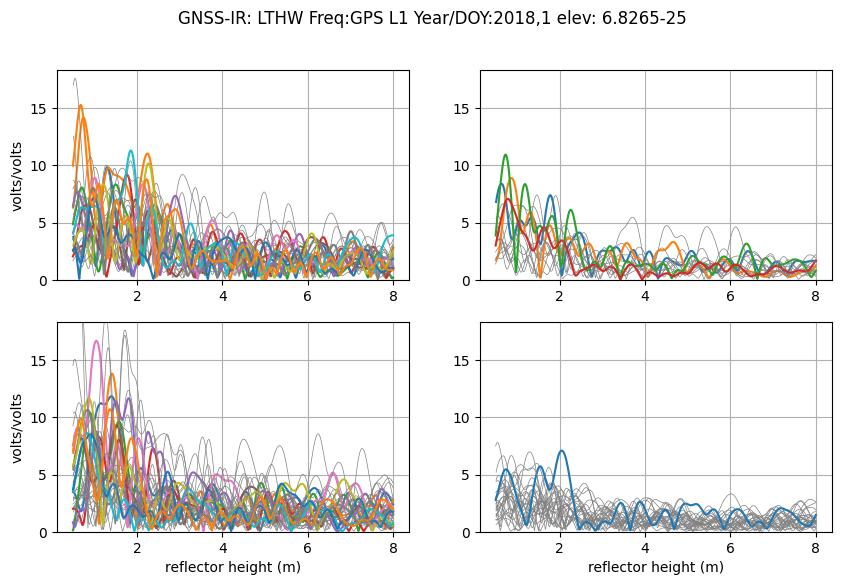

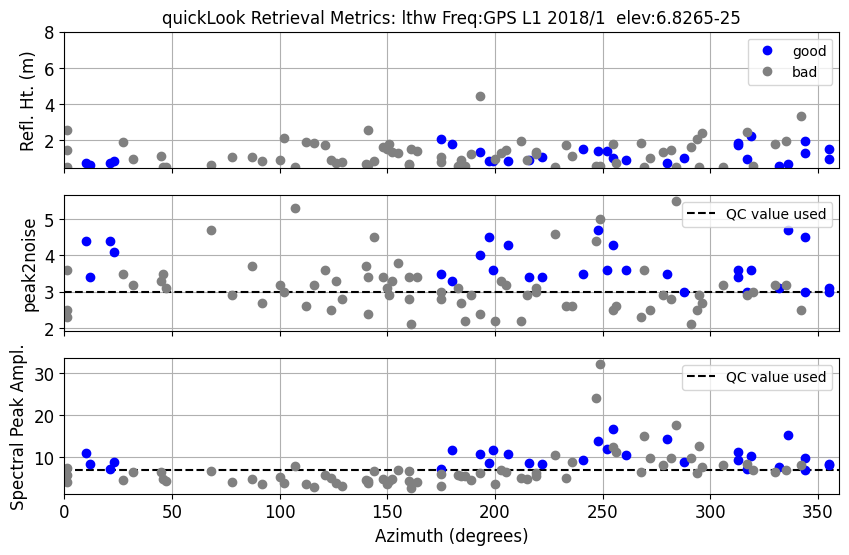

In [7]:
values, metrics = quicklook(station, year, doy=doy)

This is a bit of a mess really. If there are significant peaks, they are really 
close to the cutoff for the method (at 0.5 meters). Let's compare with about a week later.
First make a SNR file:

lthw  year: 2018  doy: 9 from:  all
Requested a GPS only nav file
100% [..............................................................................] 74587 / 74587found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto0090.18n
https://data.unavco.org/archive/gnss/rinex/obs/2018/009/lthw0090.18d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/lthw/lthw0090.18.snr66
That took  2.75  seconds
Feedback written to subdirectory logs
minimum elevation angle (degrees) for this dataset:  6.7966
It looks like the receiver had an elevation mask. Overriding e1 to this value.
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_summary.png


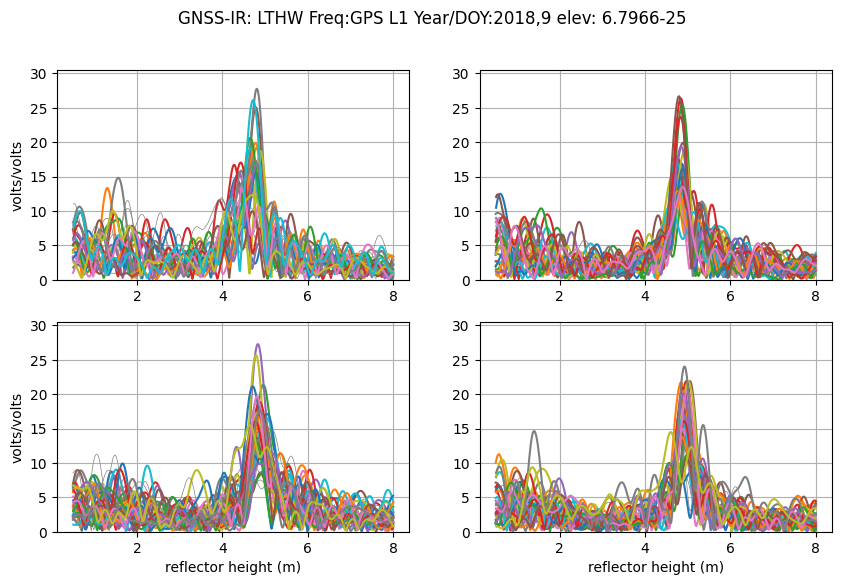

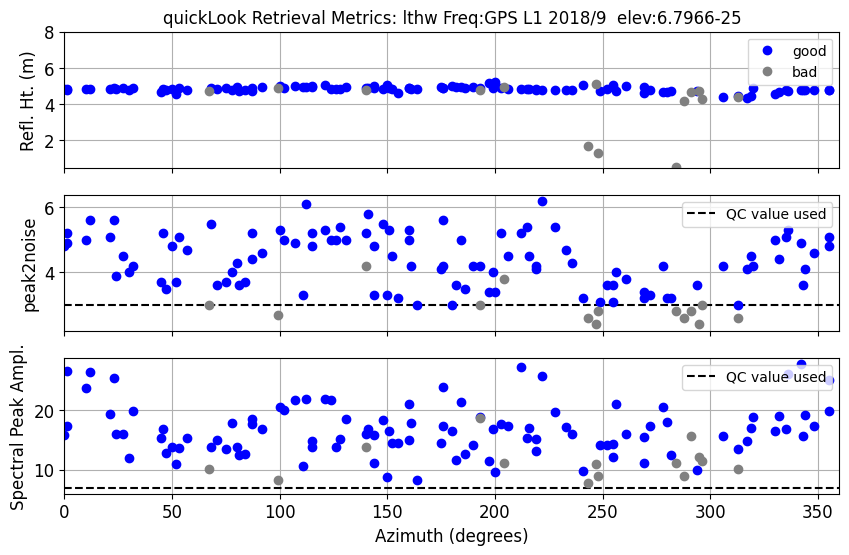

In [8]:
rinex2snr(station, year=year, doy=9)

values, metrics = quicklook(station, year, doy=9)

This is *much* better and clearly shows that a field crew reset the antenna to a little 
less than 5 meters sometime between day 1 and day 9 in the year 2018. The second plot to gives an idea of how well the method performs for various azimuths and QC parameters.

Except for a region ~270-300 degrees in azimuth, and directly south, retrievals are consistently good.
A peak to noise ratio of 3 appears to be appropriate. The rejected southern retrievals are unlikely to be 
of local origin, but rather related to the inclination of the satellite orbits at this latitude.

Lets compare this to the first day of 2020:

lthw  year: 2020  doy: 1 from:  all
Requested a GPS only nav file
100% [..............................................................................] 75825 / 75825found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2020/nav/auto0010.20n
https://data.unavco.org/archive/gnss/rinex/obs/2020/001/lthw0010.20d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2020/snr/lthw/lthw0010.20.snr66
That took  1.91  seconds
Feedback written to subdirectory logs
minimum elevation angle (degrees) for this dataset:  6.8163
It looks like the receiver had an elevation mask. Overriding e1 to this value.
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/quickLook_summary.png


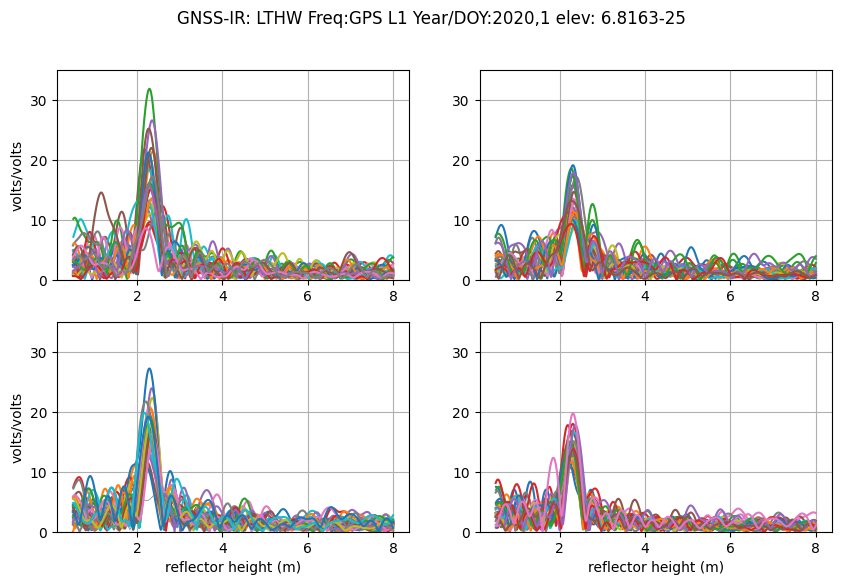

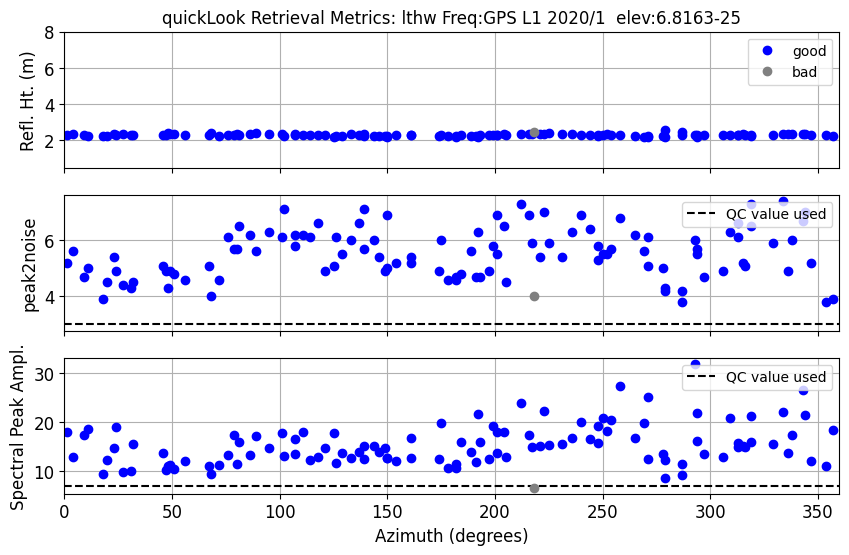

In [9]:
rinex2snr(station, year=2020, doy=1)

values, metrics = quicklook(station, year=2020, doy=1)

Now the peaks in the reflector height (RH) periodograms are ~2.2 meters - 
so that means that there was ~2.5 meters of surface change from 2018 to 2020.

## Measure Snow Accumulation for 2018

Translate the GPS data for the year of 2018:

In [10]:
rinex2snr(station, year, 1, doy_end=366, weekly=weekly.value)

You have invoked the weekly option
SNR file already exists /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/lthw/lthw0010.18.snr66
lthw  year: 2018  doy: 8 from:  all
Requested a GPS only nav file
100% [..............................................................................] 74367 / 74367found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto0080.18n
https://data.unavco.org/archive/gnss/rinex/obs/2018/008/lthw0080.18d.Z
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2018/snr/lthw/lthw0080.18.snr66
lthw  year: 2018  doy: 15 from:  all
Requested a GPS only nav file
100% [..............................................................................] 74519 / 74519found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2018/nav/auto0150.18n
https://data.unavco.org/archive/gnss/rinex/ob

100% [........................................................] 101455 / 101455found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto1750.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/175/lthw1750.18d.Z
100% [........................................................] 379509 / 379509
 File has been found  lthw1750.18d.Z
Download took  1.07  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw1750.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 176 from:  all
Requested a GPS only nav file
100% [........................................................] 101699 / 101699found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto1760.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/176/lthw1760.18d.Z
100% [........................................................] 380873 / 380873
 File has been found  lthw1760.18d.Z
Download took  0.98  seconds


SUCCESS: SNR f

100% [..........................................................] 98085 / 98085found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto1890.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/189/lthw1890.18d.Z
100% [........................................................] 379201 / 379201
 File has been found  lthw1890.18d.Z
Download took  0.95  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw1890.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 190 from:  all
Requested a GPS only nav file
100% [..........................................................] 99541 / 99541found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto1900.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/190/lthw1900.18d.Z
100% [........................................................] 382133 / 382133
 File has been found  lthw1900.18d.Z
Download took  1.13  seconds


SUCCESS: SNR f

100% [..........................................................] 99123 / 99123found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2020.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/202/lthw2020.18d.Z
100% [........................................................] 383921 / 383921
 File has been found  lthw2020.18d.Z
Download took  0.86  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2020.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 203 from:  all
Requested a GPS only nav file
100% [..........................................................] 97451 / 97451found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2030.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/203/lthw2030.18d.Z
100% [........................................................] 382501 / 382501
 File has been found  lthw2030.18d.Z
Download took  1.11  seconds


SUCCESS: SNR f

100% [..........................................................] 98587 / 98587found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2160.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/216/lthw2160.18d.Z
100% [........................................................] 382853 / 382853
 File has been found  lthw2160.18d.Z
Download took  1.31  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2160.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 217 from:  all
Requested a GPS only nav file
100% [..........................................................] 96889 / 96889found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2170.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/217/lthw2170.18d.Z
100% [........................................................] 381379 / 381379
 File has been found  lthw2170.18d.Z
Download took  1.06  seconds


SUCCESS: SNR f

100% [..........................................................] 97415 / 97415found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2300.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/230/lthw2300.18d.Z
100% [........................................................] 379839 / 379839
 File has been found  lthw2300.18d.Z
Download took  0.94  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2300.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 231 from:  all
Requested a GPS only nav file
100% [..........................................................] 96787 / 96787found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2310.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/231/lthw2310.18d.Z
100% [........................................................] 379111 / 379111
 File has been found  lthw2310.18d.Z
Download took  0.93  seconds


SUCCESS: SNR f

100% [........................................................] 108757 / 108757found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2440.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/244/lthw2440.18d.Z
100% [........................................................] 379539 / 379539
 File has been found  lthw2440.18d.Z
Download took  1.03  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2440.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 245 from:  all
Requested a GPS only nav file
100% [........................................................] 108143 / 108143found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2450.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/245/lthw2450.18d.Z
100% [........................................................] 380593 / 380593
 File has been found  lthw2450.18d.Z
Download took  0.99  seconds


SUCCESS: SNR f

100% [........................................................] 107663 / 107663found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2580.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/258/lthw2580.18d.Z
100% [........................................................] 380877 / 380877
 File has been found  lthw2580.18d.Z
Download took  0.94  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2580.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 259 from:  all
Requested a GPS only nav file
100% [........................................................] 107047 / 107047found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2590.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/259/lthw2590.18d.Z
100% [........................................................] 379549 / 379549
 File has been found  lthw2590.18d.Z
Download took  1.07  seconds


SUCCESS: SNR f

100% [........................................................] 106383 / 106383found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2720.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/272/lthw2720.18d.Z
100% [........................................................] 380457 / 380457
 File has been found  lthw2720.18d.Z
Download took  1.4  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2720.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 273 from:  all
Requested a GPS only nav file
100% [........................................................] 107537 / 107537found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2730.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/273/lthw2730.18d.Z
100% [........................................................] 378791 / 378791
 File has been found  lthw2730.18d.Z
Download took  1.58  seconds


SUCCESS: SNR fi

100% [........................................................] 107681 / 107681found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2860.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/286/lthw2860.18d.Z
100% [........................................................] 382067 / 382067
 File has been found  lthw2860.18d.Z
Download took  2.25  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw2860.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 287 from:  all
Requested a GPS only nav file
100% [........................................................] 106511 / 106511found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto2870.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/287/lthw2870.18d.Z
100% [........................................................] 379525 / 379525
 File has been found  lthw2870.18d.Z
Download took  1.12  seconds


SUCCESS: SNR f

100% [........................................................] 106937 / 106937found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3000.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/300/lthw3000.18d.Z
100% [........................................................] 379759 / 379759
 File has been found  lthw3000.18d.Z
Download took  0.88  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw3000.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 301 from:  all
Requested a GPS only nav file
100% [........................................................] 107069 / 107069found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3010.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/301/lthw3010.18d.Z
100% [........................................................] 379655 / 379655
 File has been found  lthw3010.18d.Z
Download took  1.28  seconds


SUCCESS: SNR f

100% [........................................................] 105299 / 105299found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3140.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/314/lthw3140.18d.Z
100% [........................................................] 379375 / 379375
 File has been found  lthw3140.18d.Z
Download took  1.2  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw3140.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 315 from:  all
Requested a GPS only nav file
100% [........................................................] 104039 / 104039found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3150.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/315/lthw3150.18d.Z
100% [........................................................] 378479 / 378479
 File has been found  lthw3150.18d.Z
Download took  1.0  seconds


SUCCESS: SNR fil

uncompress: auto3270.18n.Z: Inappropriate file type or format


Try the gzipped version
Change the filename to what we use  auto3270.18n
Orbit file:  ../../../orbits/2018/nav/auto3270.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/327/lthw3270.18d.Z
100% [........................................................] 371311 / 371311
 File has been found  lthw3270.18d.Z
Download took  1.02  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw3270.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 328 from:  all
Requested a GPS only nav file
100% [........................................................] 101471 / 101471found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3280.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/328/lthw3280.18d.Z
100% [........................................................] 371903 / 371903
 File has been found  lthw3280.18d.Z
Download took  0.97  seconds


SUCCESS: SNR file was created: ../../../2018

100% [........................................................] 105995 / 105995found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3410.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/341/lthw3410.18d.Z
100% [........................................................] 368361 / 368361
 File has been found  lthw3410.18d.Z
Download took  0.91  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw3410.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 342 from:  all
Requested a GPS only nav file
100% [........................................................] 105811 / 105811found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3420.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/342/lthw3420.18d.Z
100% [........................................................] 373199 / 373199
 File has been found  lthw3420.18d.Z
Download took  0.94  seconds


SUCCESS: SNR f

100% [........................................................] 106817 / 106817found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3550.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/355/lthw3550.18d.Z
100% [........................................................] 378465 / 378465
 File has been found  lthw3550.18d.Z
Download took  1.18  seconds


SUCCESS: SNR file was created: ../../../2018/snr/lthw/lthw3550.18.snr66
Will seek the RINEX file from an external archive
lthw  year: 2018  doy: 356 from:  all
Requested a GPS only nav file
100% [........................................................] 106291 / 106291found nav file at SOPAC
Orbit file:  ../../../orbits/2018/nav/auto3560.18n
Searching the  sopac  archive for  lthw
ftp://garner.ucsd.edu/pub/rinex/2018/356/lthw3560.18d.Z
100% [........................................................] 380395 / 380395
 File has been found  lthw3560.18d.Z
Download took  1.36  seconds


SUCCESS: SNR f

Then you need to make the list of analysis inputs (stored in json format):

In [12]:
make_gnssir_input(station, e1=7, peak2noise=3.2, l1=True)

Assume you want to use the UNR database.
Using standard frequency choices.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/lthw.json


It is fine to hand edit the json file to remove the unreliable azimuths if 
you prefer.

Now analyze the data for 2018 from day 1 to day 365 using **gnssir**:

In [14]:
gnssir(station, year, doy, doy_end=366)

{'station': 'lthw', 'lat': -76.458318357, 'lon': -107.781941515, 'ht': 1011.4950948, 'minH': 0.5, 'maxH': 8.0, 'e1': 7, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 3.2, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [0, 360], 'freqs': [1], 'reqAmp': [5.0], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'lthw_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [0, 360]
Using azimuths:  [0, 360]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/lthw_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file should be stored here: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/gpt_1wA.pick

Using:  ../../../2018/snr/lthw/lthw1440.18.snr66
Results will be written to: ../../../2018/results/lthw//144.txt
Using:  ../../../2018/snr/lthw/lthw1450.18.snr66
Results will be written to: ../../../2018/results/lthw//145.txt
Using:  ../../../2018/snr/lthw/lthw1460.18.snr66
Results will be written to: ../../../2018/results/lthw//146.txt
Using:  ../../../2018/snr/lthw/lthw1470.18.snr66
Results will be written to: ../../../2018/results/lthw//147.txt
Using:  ../../../2018/snr/lthw/lthw1480.18.snr66
Results will be written to: ../../../2018/results/lthw//148.txt
Using:  ../../../2018/snr/lthw/lthw1490.18.snr66
Results will be written to: ../../../2018/results/lthw//149.txt
Using:  ../../../2018/snr/lthw/lthw1500.18.snr66
Results will be written to: ../../../2018/results/lthw//150.txt
Using:  ../../../2018/snr/lthw/lthw1510.18.snr66
Results will be written to: ../../../2018/results/lthw//151.txt
Using:  ../../../2018/snr/lthw/lthw1520.18.snr66
Results will be written to: ../../../2018/resul

Using:  ../../../2018/snr/lthw/lthw2170.18.snr66
Results will be written to: ../../../2018/results/lthw//217.txt
Using:  ../../../2018/snr/lthw/lthw2180.18.snr66
Results will be written to: ../../../2018/results/lthw//218.txt
Using:  ../../../2018/snr/lthw/lthw2190.18.snr66
Results will be written to: ../../../2018/results/lthw//219.txt
Using:  ../../../2018/snr/lthw/lthw2200.18.snr66
Results will be written to: ../../../2018/results/lthw//220.txt
Using:  ../../../2018/snr/lthw/lthw2210.18.snr66
Results will be written to: ../../../2018/results/lthw//221.txt
Using:  ../../../2018/snr/lthw/lthw2220.18.snr66
Results will be written to: ../../../2018/results/lthw//222.txt
Using:  ../../../2018/snr/lthw/lthw2230.18.snr66
Results will be written to: ../../../2018/results/lthw//223.txt
Using:  ../../../2018/snr/lthw/lthw2240.18.snr66
Results will be written to: ../../../2018/results/lthw//224.txt
Using:  ../../../2018/snr/lthw/lthw2250.18.snr66
Results will be written to: ../../../2018/resul

Using:  ../../../2018/snr/lthw/lthw2900.18.snr66
Results will be written to: ../../../2018/results/lthw//290.txt
Using:  ../../../2018/snr/lthw/lthw2910.18.snr66
Results will be written to: ../../../2018/results/lthw//291.txt
Using:  ../../../2018/snr/lthw/lthw2920.18.snr66
Results will be written to: ../../../2018/results/lthw//292.txt
Using:  ../../../2018/snr/lthw/lthw2930.18.snr66
Results will be written to: ../../../2018/results/lthw//293.txt
Using:  ../../../2018/snr/lthw/lthw2940.18.snr66
Results will be written to: ../../../2018/results/lthw//294.txt
Using:  ../../../2018/snr/lthw/lthw2950.18.snr66
Results will be written to: ../../../2018/results/lthw//295.txt
Using:  ../../../2018/snr/lthw/lthw2960.18.snr66
Results will be written to: ../../../2018/results/lthw//296.txt
Using:  ../../../2018/snr/lthw/lthw2970.18.snr66
Results will be written to: ../../../2018/results/lthw//297.txt
Using:  ../../../2018/snr/lthw/lthw2980.18.snr66
Results will be written to: ../../../2018/resul

Using:  ../../../2018/snr/lthw/lthw3630.18.snr66
Results will be written to: ../../../2018/results/lthw//363.txt
Using:  ../../../2018/snr/lthw/lthw3640.18.snr66
Results will be written to: ../../../2018/results/lthw//364.txt
Using:  ../../../2018/snr/lthw/lthw3650.18.snr66
Results will be written to: ../../../2018/results/lthw//365.txt
Using:  ../../../2018/snr/lthw/lthw3660.18.snr66
>>>>> Could not read the first SNR file: ../../../2018/snr/lthw/lthw3660.18.snr66


This produces reflector heights for every rising and setting satellite track that meets your 
quality control selections.  In order to estimate snow accumulation, you will want to calculate
the daily average. Using our **daily_avg** utility - and specifying 50 satellite tracks and median filter of 0.25 meters:

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_allRH.txt 

A total of  54  days were evaluated.
2  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/l

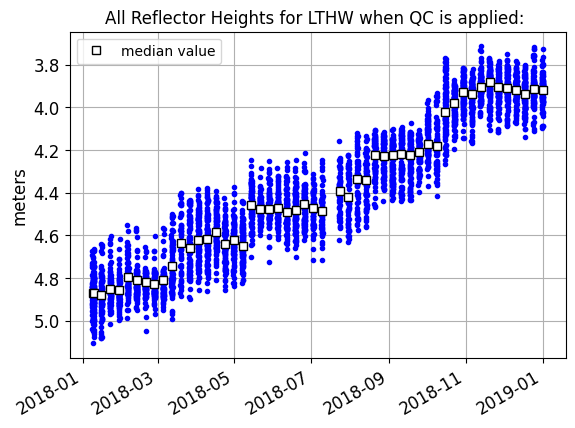

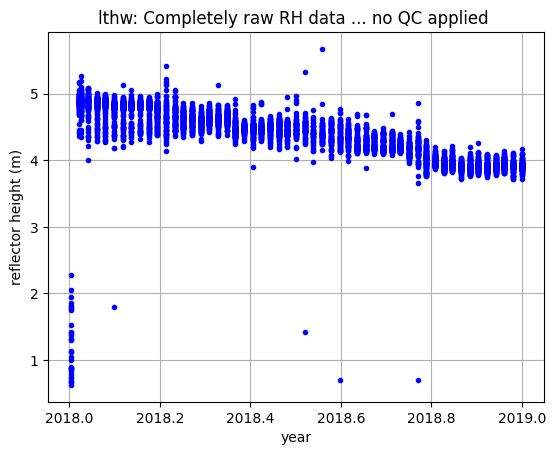

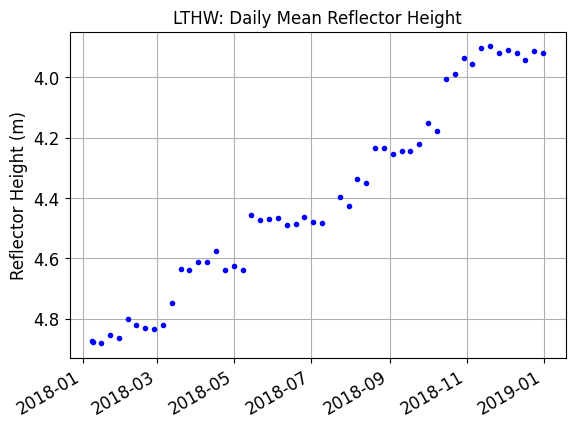

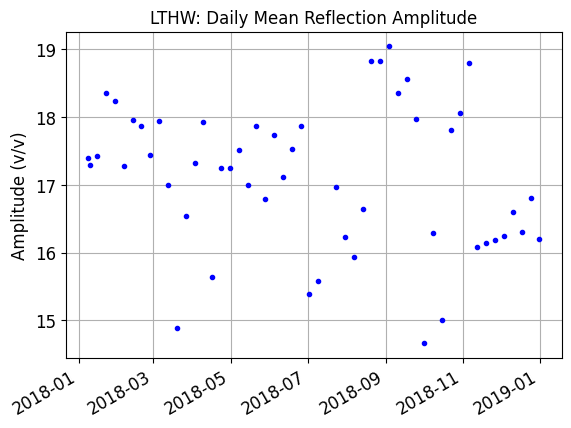

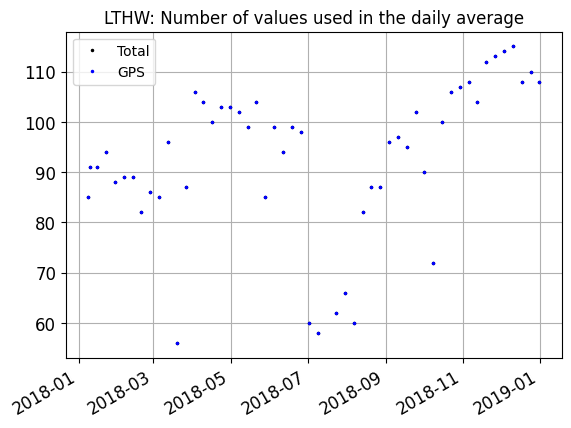


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_dailyRH.txt


In [16]:
daily_avg(station, medfilter=.25, ReqTracks=50)

You can loosen the required track number if you want, but in this case it does not change the 
overall character of the results:

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_allRH.txt 

A total of  54  days were evaluated.
2  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/l

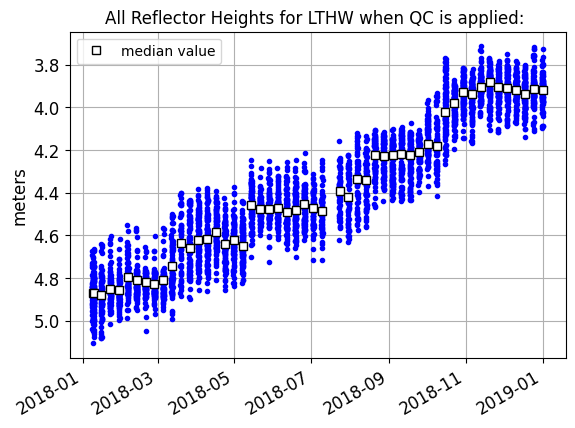

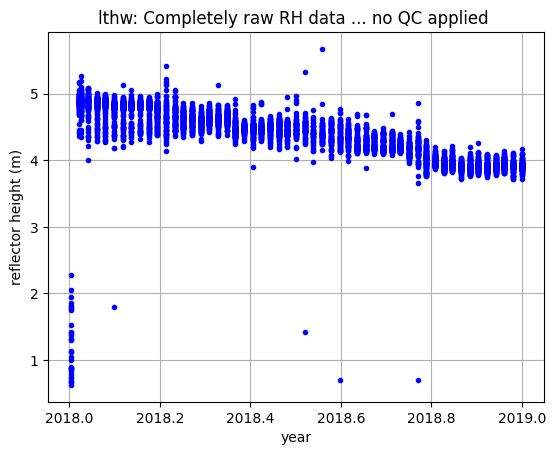

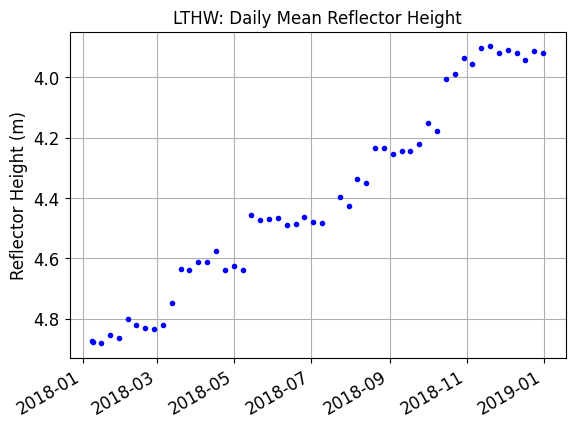

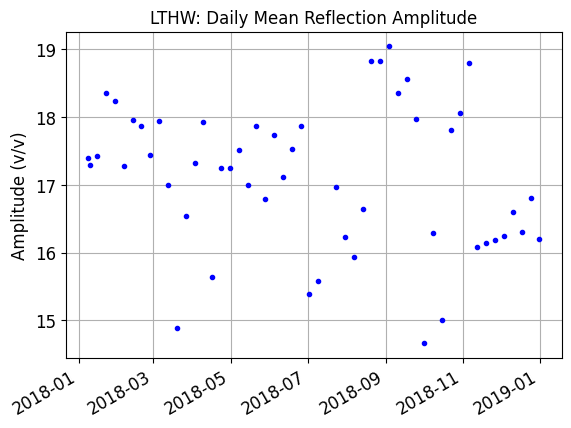

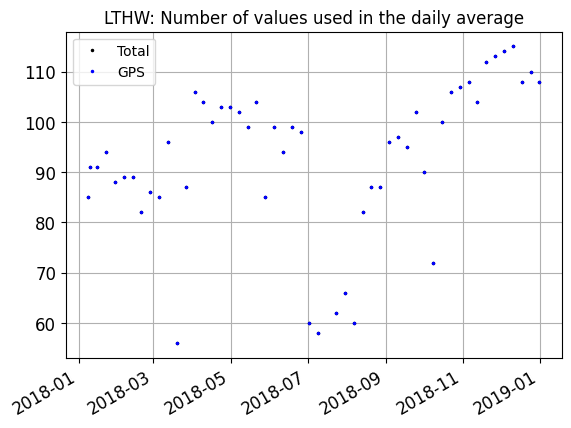


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/lthw/lthw_dailyRH.txt


In [17]:
daily_avg(station, medfilter=.25, ReqTracks=40)

If you are feeling ambitious, try looking at the data for [Upper Thwaites Glacier](https://www.unavco.org/instrumentation/networks/status/nota/overview/UTHW)